En aquest capítol aprendrem a tractar les dades que obtinguem dels nostres estudis. Concretament, mirarem tres passos claus: carregar de les dades d'un fitxer, tractar-les i guardar-les en un fitxer. Primerament, exportem els paquets que utilitzarem.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Això és per nosaltres i ja esta, he generat un fitxer que equivaldria a dades experimentals que s'han d'ajustar a Michaelis-Menten. 

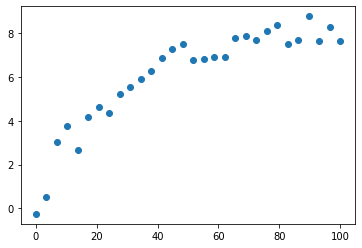

In [ ]:
#AIXÒ NO S'HA D'ENSNEYAR. ES PER GENERAR EL FITXER TXT
rand = np.random.normal(0, 0.4, 30)
conc = np.linspace(0, 100, 30)
kmax = 22
vmax = 10
v0 = vmax*conc/(kmax + conc)
plt.scatter(conc, v0+rand)
np.savetxt('v0_conc.txt', (np.array([conc, v0+rand]).T))

**CÀRREGA DE LES DADES**

El primer pas és carregar les dades que tenim d'un fitxer .txt, .csv o qualsevol altre fitxer de dades. En cas de tenir les dades en un fitxer d'Excel, cal passar-les primer a .csv o .txt. Si treballem amb Google Colab, cal carregar aquest fitxer a la finestra de l'esquerra. Per a aquest exemple, hem carregat v0_conc.txt, que té valors de v0 i de concentració d'una simulació de dades experimentals que segueixen l'equació de Michaelis-Menten. Hi ha dues maneres d'importar el fitxer: amb la versió que ofereix Python o amb la funció que aporta el paquet **Numpy**:

In [ ]:
# Versió Python
f = open("v0_conc.txt", "r")
f.read()

'0.000000000000000000e+00 -2.528570800879367253e-01\n3.448275862068965303e+00 5.403617245194970442e-01\n6.896551724137930606e+00 3.040564382588178294e+00\n1.034482758620689680e+01 3.748368071015266256e+00\n1.379310344827586121e+01 2.640107143395634459e+00\n1.724137931034482563e+01 4.166576551935955663e+00\n2.068965517241379359e+01 4.612440276830037433e+00\n2.413793103448275801e+01 4.363818215113873578e+00\n2.758620689655172242e+01 5.222269738386548177e+00\n3.103448275862068684e+01 5.527853605112503566e+00\n3.448275862068965125e+01 5.917063943615309185e+00\n3.793103448275861922e+01 6.283645906881079490e+00\n4.137931034482758719e+01 6.843415482618889989e+00\n4.482758620689654805e+01 7.267084201385311637e+00\n4.827586206896551602e+01 7.479868812703506009e+00\n5.172413793103447688e+01 6.780380086672206374e+00\n5.517241379310344485e+01 6.806490518553415470e+00\n5.862068965517241281e+01 6.906952205673060341e+00\n6.206896551724137368e+01 6.891085952626574418e+00\n6.551724137931033454e+01 7.76

La "r" correspon a "read". D'aquesta manera, podem llegir un fitxer i tota la seva informació la tenim guardada en una string (és a dir, una variable de Python que no aporta valors numèrics, sinó lletres). Si s'exporta així, caldria separar mitjançant un altre mètode.

També hi ha la opció de no penjar el fitxer a Google Colab, sinó indicar-li a quina carpeta del nostre ordinador cal anar-ho a buscar. Per exemple:

In [ ]:
f = open("D://usuari/prova/v0_conc.txt", "r")
f.read()

FileNotFoundError: ignored

En aquest cas, dins el disc dur D: hi ha una carpeta que es diu "usuari", que dins en té una altra que es diu "prova", i que és allà on es troba el fitxer.

L'altra manera de carregar les dades del fitxer és mitjançant al funció de Numpy, que és la que recomanem:

In [ ]:
conc, v0 = np.loadtxt('v0_conc.txt', unpack=True, usecols=(0,1))


Amb aquesta funció definim directament les variables *conc* i *v0*. Diem que agafi les dades del fitxer "v0_conc.txt", el que acabem de carregar. Amb **unpack=True** diem que ens pugui separar les dades per columnes (si no fiquéssim aquesta opció, una sola variable tindria totes les dades), i fent servir **usecols=(0,1)** diem les columnes del fitxer que volem agafar. A l'hora de definir les variables hem ficat *conc* la primera i *v0* la segona variable. Així doncs, amb *usecols=(0,1)* diem que la primera variable que hem definit tingui els valors de la columna 0 i que la segona variable tingui els valors de la columna 1 (recordem que amb Python, la primera columna és la 0, la segona és la 1, etc.). D'aquesta manera, ara tenim una array (llista) de les dues variables directament amb els valors extrets del fitxer que hem carregat.

Per visualitzar-ho millor, representem les variables *conc* i *v0*. Com que són dades experimentals, el gràfic més adient és un scatter plot.


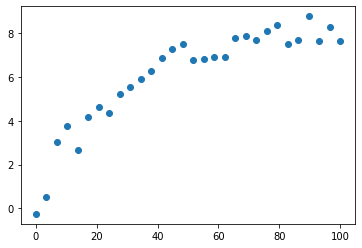

In [ ]:
plt.scatter(conc, v0)
plt.show()

El següent pas és el tractament de les dades a partir de les llistes que hem originat des del fitxer. En aquest cas, el tractament serà ajustar els valors a l'equació de Michaelis-Menten.

In [ ]:
def MM(c, v, K):
  vel0 = v *c / (K+c)
  return vel0
from scipy.optimize import curve_fit
vmax, Km = scipy.optimize.curve_fit(MM, conc, v0)[0]

Hem definit la funció de Michaelis Menten i hem ajustat els valors a una corba. El terme [0] és perquè ens doni el primer valor de la llista, ja que aquesta funció ens dona altres valors que no són els que ens interessen.

Dibuixem l'ajust amb les dades de Vmax i Km que hem obtingut. 

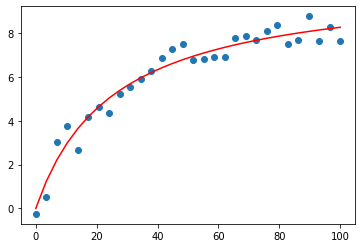

In [ ]:
plt.scatter(conc, v0)
plt.plot(conc, vmax*conc/(Km+conc), 'r')
plt.show()

Un cop hem fet el tractament de les dades, és el moment de crear un fitxer a on guardar les dades. La comanda que fem servir és open(), que és una funció per defecte de Python. El primer terme és el nom del fitxer que li voldrem ficar (ha de ser .txt), mentre que el segon terme 'w+' vol dir write (w) i sobreescriure (+). A partir d'aqui, amb el codi **resultats.write()** anirem escrivint les línies al fitxer. Per fer un salt de línia escriurem \n. Per escriure un valor dels que haguem obtingut, farem servir %.3f, on *%* és per dir que aquí s'ha de posar el valor, *.3* son els decimals que volem ficar-hi i *f* és per indicar que és un float (número amb decimals). Un cop hem escrit tot el que volíem, la comanda **resultats.close()** fa que finalitzi aquesta comanda. El fitxer s'haurà generat al mateix lloc on és el codi: si es treballa des de Colab, s'haurà generat a la finestra de l'esquerra.

In [ ]:
resultats = open('resultats.txt', 'w+')
resultats.write("L'equació de Michaelis-Menten és v0=vmax*c/(Km+c).\nEls valors que hem obtingut són:")
resultats.write("vmax = %.3f, " %(vmax))
resultats.write("Kmax = %.3f.\n" %(Km))
resultats.write("Si ho volem escriure tot en una sola línia seria:\n vmax= %.3f   Kmax = %.3f" % (vmax, Km))
resultats.close()

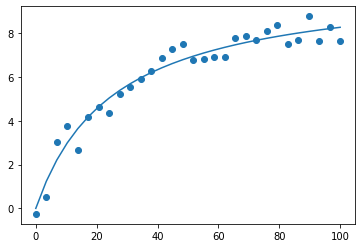

In [ ]:
#Hi ha diferent maneres de llegir i escriure fitxers. La versió que ofereix Python és
f = open("v0_conc.txt", "r")#La 'r' es correspon a 'read'. Hi ha més opcions, que ens permeten escriure fitxers així, si ho volem
f.read() #D'aquesta manera podem llegir un fitxer i tota la seva informació la tenim guardada en una string. D'aquí hauríem de separar els valors en diferents arrays, si ho desitgéssim

#Si ens interessa llegir dades (números), es recomana fer servir la funció de numpy:
conc, v0 = np.loadtxt('v0_conc.txt', unpack=True, usecols=(0,1))

#Representem els valors que hem carregat
plt.scatter(conc, v0)

#Ajustem a l'equacio de MichaelisMenten v0=vmax*c / (Km+c)
def MM(c, v, K):
  vel0 = v *c / (K+c)
  return vel0
from scipy.optimize import curve_fit
vmax, Km = scipy.optimize.curve_fit(MM, conc, v0)[0] #El valor [0] és per prendre els valors ajustats

#Dibuixem l'ajust
plt.plot(conc, vmax*conc/(Km+conc))

#Guardem els valors en un fitxer
resultats = open('resultats.txt', 'w+')
resultats.write("L'equació de Michaelis-Menten és v0=vmax*c/(Km+c).\nEls valors que hem obtingut són:")
resultats.write("vmax = %.3f" %(vmax))
resultats.write("Kmax = %.3f\n" %(Km))
resultats.write("Si ho volem escriure tot en una sola línia seria:\n vmax= %.3f   Kmax = %.3f" % (vmax, Km))
resultats.close()
